# Ex. 2.1 - Integrali con metodi MC: l'importance sampling

In questo esercizio si è fatto uso di due metodi MC per stimare il seguente integrale $1D$ :
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
1. il metodo adottato negli esercizi precedenti - il campionamento di una distribuzione di probabilità uniforme nell'intervallo di integrazione

2. il metodo dell'$\textit importance$ $\textit sampling$ - ovvero il campionamento di una distribuzione di probabilità non uniforme.

Nel caso $(1)$ un generico integrale $\int_{\Omega}f(x)dx$ viene interpretato come il valor medio della RV $f(x)$ distribuita con distribuzione di probabilità $p(x)$ uniforme su $\Omega$, ovvero:
$$p(x) =
\bigg \{
\begin{array}{rl}
1 & x \in \Omega \\
0 & x \notin \Omega \\
\end{array}
$$

Ci si può chiedere se esista un modo per migliorare la stima dell'integrale, ovvero se sia possibile ridurre l'errore statistico, che per una simulazione di $N$ passi MC risulta $\epsilon = \sigma_f/\sqrt{N}$, dove

$$\sigma^2_f=\int_{\Omega}f^{2}(x)dx - I^2$$

L'$importance$ $sampling$ consiste nell'introdurre una nuova distribuzione di probabilità $g(x)$ e riscrivere l'integrale $I$ come:

$$I = \int_{\Omega}\biggl(\frac{f(x)}{g(x)}\biggr)g(x)dx$$

a patto che $\frac{f(x)}{g(x)}<\infty$ a meno di un insieme di punti a misura nulla.

L'integrale può quindi essere interpretato come il valor medio della RV $f(x)/g(x)$ distribuita con distribuzione di probabilità $g(x)$. A questo punto, la nuova varianza è

$$\sigma^2_{f/g}= \int_{\Omega}\biggl(\frac{f(x)}{g(x)}\biggr)^{2}g(x)dx - I^2$$

Quindi, se si mantiene costante il numero si step MC, l'unico modo per ridurre $\epsilon$ è ridurre la varianza  $\sigma^2_{f/g}$. È possibile dimostrare che la funzione $g(x)$ che minimizza $\sigma^2_{f/g}$ - con i costraint $g(x)>0$ e $\int_{\Omega}g(x)dx=1$ - soddisfa $g(x)\propto |f(x)|$. L'effetto di scegliere una $g(x)$ simile alla funzione integranda originale $f(x)$ sarà quindi una riduzione dell'errore statistico finale.

### Stima di  $I$ con $p(x)$ uniforme 

Innanzitutto sono stati stimati $I$ e il relativo errore statistico tramite un campionamento della distribuzione di probabilità uniforme sull'intervallo $[0,1)$ per un totale di $M=10^5$ passi MC ($N=100$ blocchi, $1000$ passi per blocco). Di seguito si riporta il grafico di $I$ con relativo errore in funzione del numero di blocchi.

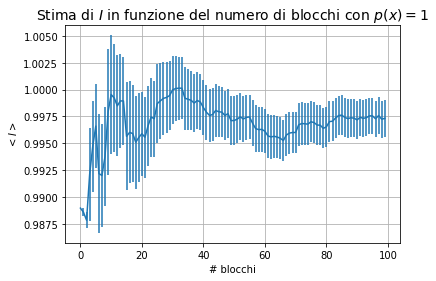

Miglior stima di I:  0.997 +/- 0.002
Valore teorico di I: 1


In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import decimal

# caricamento da file della stima di I e relativo errore statistico in funzione del n di blocchi (p uniforme)
I, err = np.loadtxt("Output/Uniform.txt", usecols=(0,1), delimiter = ' ', unpack = 'true')

N = len(I)
x = np.arange(N)

# grafico stima di I in funzione del numero di blocchi (p uniforme)
plt.errorbar(x,I,yerr=err)
plt.xlabel('# blocchi')
plt.ylabel('$<I>$')
plt.title('Stima di $I$ in funzione del numero di blocchi con $p(x)=1$',size=14)
plt.grid(True)
plt.show()

print("Miglior stima di I: ",round(I[N-1],3),"+/-",round(err[N-1],3))
print("Valore teorico di I: 1")

### Stima di  $I$ con $p(x)=2(1-x)$ (importance sampling) 

Per stimare $I$ con il metodo dell'$\textit importance$ $\textit sampling$ è stata scelta la distribuzione di probabilità
$$p(x)=2(1-x), x \in [0,1)$$
che approssima la f(x) meglio di una costante e che è facilmente campionabile grazie al metodo dell'inversa della cumulativa. Per poter confrontare l'errore con quello ottenuto con la p(x) uniforme sono stati utilizzati gli stessi valori di $M$ e $N$. Di seguito si riporta il grafico di $I$ con relativo errore in funzione del numero di blocchi.

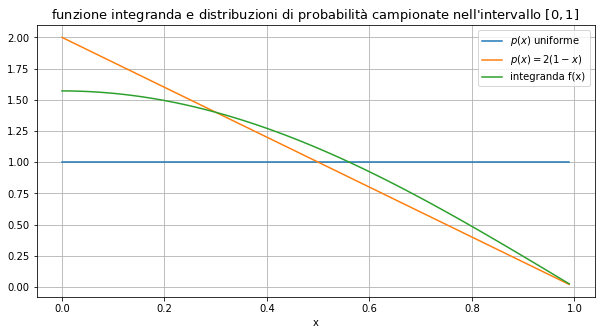

In [34]:
def Uniform(x):
    return 1+x*0
def Linear(x):
    return 2*(1-x)
def F(x):
    return math.pi*np.cos(math.pi*x/2)/2

X = np.arange(0,1,0.01)

# plot per confronto funzione integranda e distribuzioni di probabilità campionate
plt.figure(figsize=(10,5))
plt.plot(X,Uniform(X),label = '$p(x)$ uniforme')
plt.plot(X,Linear(X),label = '$p(x)=2(1-x)$')
plt.plot(X,F(X),label = 'integranda f(x)')
plt.xlabel('x')
plt.title('funzione integranda e distribuzioni di probabilità campionate nell\'intervallo $[0,1]$',size=13)
plt.legend()
plt.grid(True)
plt.show()

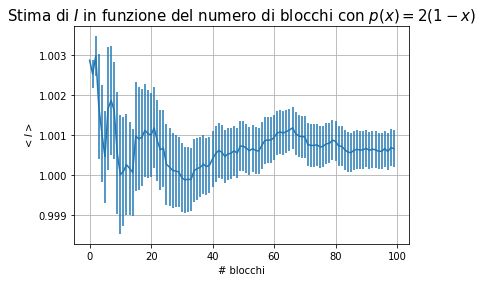

Miglior stima di I:  1.0007 +/- 0.0005
Valore teorico di I: 1


In [6]:
# caricamento da file della stima di I e relativo errore statistico in funzione del n di blocchi (p = 2(1-x))
I, err = np.loadtxt("Output/Importance.txt", usecols=(0,1), delimiter = ' ', unpack = 'true')

N = len(I)
x = np.arange(N)

# grafico stima di I in funzione del numero di blocchi
plt.errorbar(x,I,yerr=err)
plt.xlabel('# blocchi')
plt.ylabel('$<I>$')
plt.title('Stima di $I$ in funzione del numero di blocchi con $p(x)=2(1-x)$',size=15)
plt.grid(True)
plt.show()

print("Miglior stima di I: ",round(I[N-1],4),"+/-",round(err[N-1],4))
print("Valore teorico di I: 1")

Gli errori statistici sulle due stime sono:
- $\epsilon_{uniforme}=0.002$
- $\epsilon_{importance}=0.0005$

I risultati mostrano che effettivamente il metodo dell'$\textit importance$ $\textit sampling$ permette di ridurre l'incertezza statistica sulla stima di un integrale con metodi MC.